In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.transform import resize
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import morphology


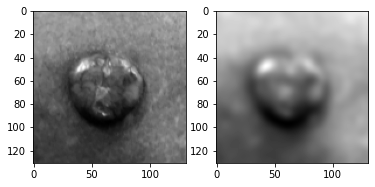

In [37]:
file_im = 'PAT_78_118_164.png'
im = plt.imread(file_im)
im = rgb2gray(im)

#Resize for speed
im = resize(im, (im.shape[0] // 4, im.shape[1] // 4),anti_aliasing=True)
im2 = gaussian(im, 3)


plt.subplot(1,2,1)
plt.imshow(im, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(im2, cmap="gray")

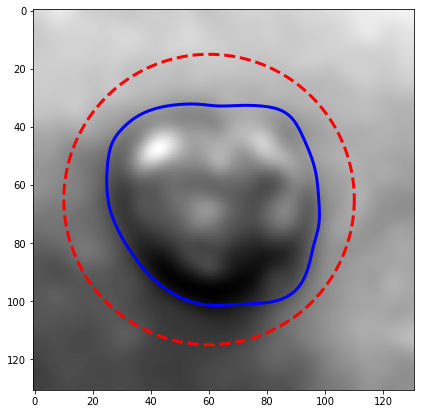

In [25]:
s = np.linspace(0, 2*np.pi, 200)   #Number of points on the circle
r = 65 + 50*np.sin(s)            #Row 
c = 60 + 50*np.cos(s)            #Column
init2 = np.array([r, c]).T



# Run active contour segmentation, the snake will be an array of the same shape as init
snake = active_contour(im2, init2, w_line=0)


# Show
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im2, cmap=plt.cm.gray)
ax.plot(init2[:, 1], init2[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)

plt.show()

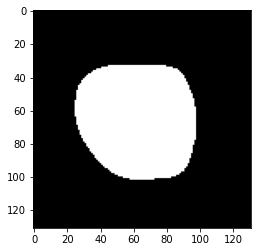

In [26]:
from skimage.draw import polygon

# Create an empty image to add the mask to
mask = np.zeros_like(im2)

# Find coordinates inside the polygon defined by the snake
rr, cc = polygon(snake[:, 0], snake[:, 1], im.shape)

# This is the foreground class
mask[rr, cc] = 1

plt.imshow(mask, cmap="gray")

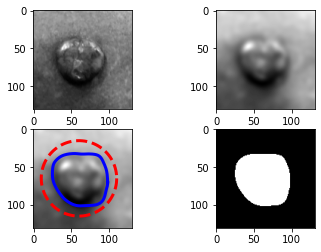

In [62]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(im, cmap="gray")
axs[0, 1].imshow(im2, cmap="gray")
axs[1, 0].imshow(im2, cmap=plt.cm.gray)
axs[1, 0].plot(init2[:, 1], init2[:, 0], '--r', lw=3)
axs[1, 0].plot(snake[:, 1], snake[:, 0], '-b', lw=3)
axs[1, 1].imshow(mask, cmap="gray")


In [27]:
#Total size of the image
total = mask.shape[0] * mask.shape[1] 

#Size of mask only
area = np.sum(mask)

#As percentage
print(area/total*100)

24.771283724724665


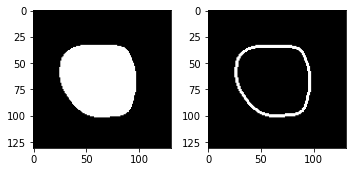

In [28]:
#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(3)

# Use this "brush" to erode the image - eat away at the borders
mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()
perimeter_im = mask - mask_eroded

plt.imshow(perimeter_im, cmap='gray')